In [2]:
# Import Pandas for data manipulation
import pandas as pd 
# Import NumPy for numerical operations
import numpy as np
# For composing transformers for different data types
from sklearn.compose import make_column_transformer  
# For building a machine learning pipeline
from sklearn.pipeline import Pipeline  
# For preprocessing data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# For using a Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor  
# For using a Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split  
# For evaluating the model performance
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error  
# Import warnings module to suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings during execution for cleaner output

In [3]:
house_ml = pd.read_csv('sing_house_price_cleaned.csv',index_col=0)

In [3]:
house_ml.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,flat_age_months,lease_exp
0,ANG MO KIO,2 ROOM,Mid_Rise_Building,44.0,Improved,232000.0,528,208
1,ANG MO KIO,3 ROOM,Low_Rise_Building,67.0,New Generation,250000.0,540,187
2,ANG MO KIO,3 ROOM,Low_Rise_Building,67.0,New Generation,262000.0,516,233
3,ANG MO KIO,3 ROOM,Low_Rise_Building,68.0,New Generation,265000.0,516,229
4,ANG MO KIO,3 ROOM,Low_Rise_Building,67.0,New Generation,265000.0,516,233


In [4]:
X = house_ml.drop('resale_price', axis=1)
Y = house_ml['resale_price']

In [5]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
# ColumnTransformer
ct = make_column_transformer((StandardScaler(), ['floor_area_sqm', 'flat_age_months', 'lease_exp']),
                             (OneHotEncoder(), ['town', 'flat_type', 'storey_range', 'flat_model']),
                              remainder="drop"  # all other columns in X will be dropped.
                             )
ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['floor_area_sqm', 'flat_age_months',
                                  'lease_exp']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['town', 'flat_type', 'storey_range',
                                  'flat_model'])])

In [7]:
# Create a pipeline with the ColumnTransformer and a model 
model_dt = Pipeline(steps=[('processor',ct), 
                           ('regressor', DecisionTreeRegressor())])
model_dt.fit(x_train,y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['floor_area_sqm',
                                                   'flat_age_months',
                                                   'lease_exp']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['town', 'flat_type',
                                                   'storey_range',
                                                   'flat_model'])])),
                ('regressor', DecisionTreeRegressor())])

'''model = DecisionTreeRegressor(criterion='squared_error',
        max_depth=9,
        max_features=None,
        min_samples_split=6, 
        min_weight_fraction_leaf=0, 
        splitter='best')
pred = ct.predict'''

In [8]:
dt_train_pred = model_dt.predict(x_train)
dt_test_pred = model_dt.predict(x_test)

### Model Evaluation - Decision Tree

In [9]:
MSE_dt_train =  mean_squared_error(y_train,dt_train_pred)
MSE_dt_test = mean_squared_error(y_test,dt_test_pred)
rmse_dt_train =np.sqrt(mean_squared_error(y_train,dt_train_pred))
rmse_dt_test = np.sqrt(mean_squared_error(y_test,dt_test_pred))
r2_dt_train = r2_score(y_train, dt_train_pred)
r2_dt_test = r2_score(y_test, dt_test_pred)
MAE_dt_train = mean_absolute_error(y_train, dt_train_pred)
MAE_dt_test = mean_absolute_error(y_test, dt_test_pred)

In [11]:
metrics = { 'Model' : ['DecisionTreeRegressor_Train','DecisionTreeRegressor_Test'],
            'Mean_Absolute_Error':[MAE_dt_train,MAE_dt_test],
            'Mean_Squared_Error': [MSE_dt_train,MSE_dt_test], 
            'Root_Mean_Squared_Error': [rmse_dt_train,rmse_dt_test],
            'R-Squared':[r2_dt_train,r2_dt_test]
           }

dt_model_evaluation = pd.DataFrame(metrics)
dt_model_evaluation

,Model,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error,R-Squared
0,DecisionTreeRegressor_Train,5455.164451,1.629427e+08,12764.899921,0.994304
1,DecisionTreeRegressor_Test,31161.621168,2.052082e+09,45299.910755,0.928521


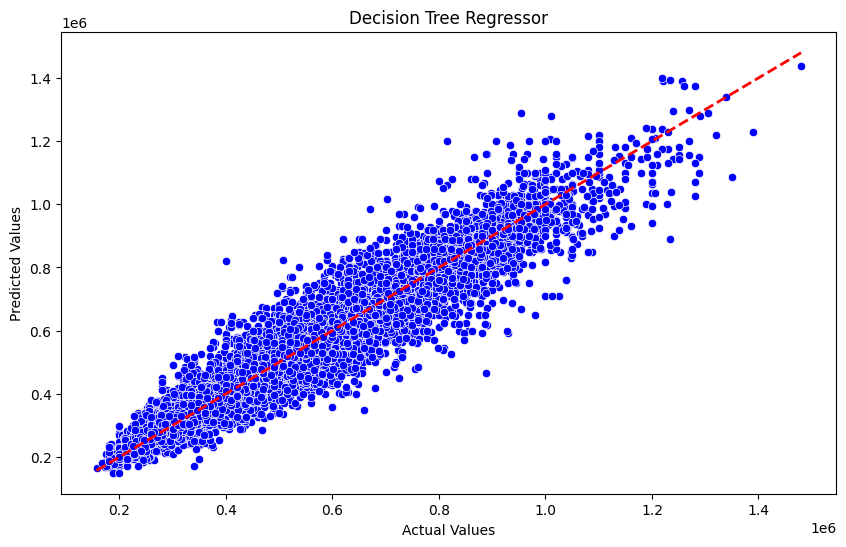

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=dt_test_pred, color='blue')

# labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regressor")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Show the plot
plt.show()

## RandomForestRegressor

In [12]:
from sklearn.ensemble import RandomForestRegressor
# Create a pipeline with the ColumnTransformer and a model 
model_rf = Pipeline(steps=[('processor',ct), 
                           ('regressor', RandomForestRegressor())])
model_rf.fit(x_train,y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['floor_area_sqm',
                                                   'flat_age_months',
                                                   'lease_exp']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['town', 'flat_type',
                                                   'storey_range',
                                                   'flat_model'])])),
                ('regressor', RandomForestRegressor())])

In [13]:
rf_train_pred = model_rf.predict(x_train)
rf_test_pred = model_rf.predict(x_test)

### Model Evaluation RandomForestRegressor

In [14]:
MSE_rf_train =  mean_squared_error(y_train,rf_train_pred)
MSE_rf_test = mean_squared_error(y_test,rf_test_pred)
rmse_rf_train =np.sqrt(mean_squared_error(y_train,rf_train_pred))
rmse_rf_test = np.sqrt(mean_squared_error(y_test,rf_test_pred))
r2_rf_train = r2_score(y_train, rf_train_pred)
r2_rf_test = r2_score(y_test, rf_test_pred)
MAE_rf_train = mean_absolute_error(y_train, rf_train_pred)
MAE_rf_test = mean_absolute_error(y_test, rf_test_pred)

In [15]:
metrics_rf = { 'Model' : ['RandomForestRegressor_Train','RandomForestRegressor_Test'],
            'Mean_Absolute_Error':[MAE_rf_train,MAE_rf_test],
            'Mean_Squared_Error': [MSE_rf_train,MSE_rf_test], 
            'Root_Mean_Squared_Error': [rmse_rf_train,rmse_rf_test],
            'R-Squared':[r2_rf_train,r2_rf_test]
           }

rf_model_evaluation = pd.DataFrame(metrics_rf)
rf_model_evaluation

,Model,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error,R-Squared
0,RandomForestRegressor_Train,12092.124716,3.048169e+08,17459.006637,0.989344
1,RandomForestRegressor_Test,25948.723068,1.347751e+09,36711.722065,0.953054


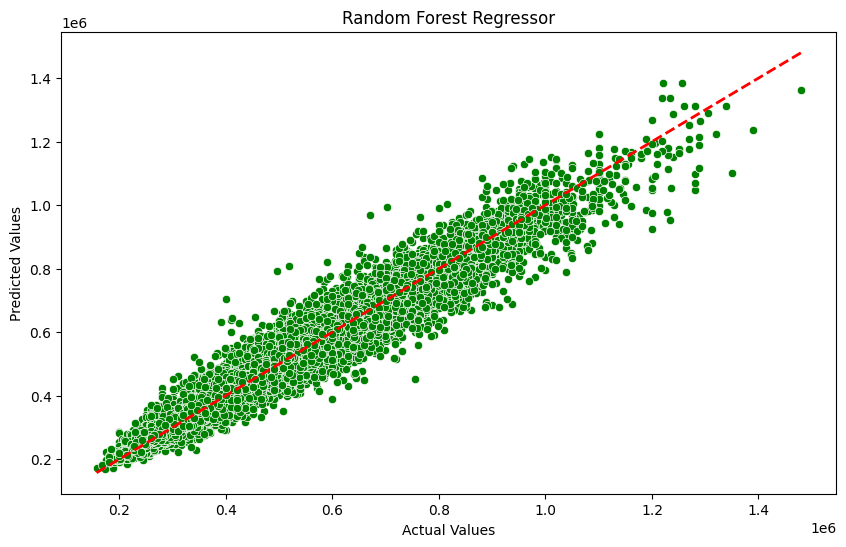

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_test_pred, color='green')

# labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Show the plot
plt.show()

## Model Comparision

In [17]:
model_comparision = pd.concat([dt_model_evaluation,rf_model_evaluation],axis=0).reset_index(drop=True)
model_comparision

,Model,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error,R-Squared
0,DecisionTreeRegressor_Train,5455.164451,1.629427e+08,12764.899921,0.994304
1,DecisionTreeRegressor_Test,31161.621168,2.052082e+09,45299.910755,0.928521
2,RandomForestRegressor_Train,12092.124716,3.048169e+08,17459.006637,0.989344
3,RandomForestRegressor_Test,25948.723068,1.347751e+09,36711.722065,0.953054


### Testing 

In [18]:
model_rf.predict(x_test)[0]

489300.0

In [19]:
y_test[0]

232000.0

In [20]:
x_train.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,flat_age_months,lease_exp
150987,PUNGGOL,4 ROOM,Mid_Rise_Building,93.0,Model A,60,1076
146146,CHOA CHU KANG,5 ROOM,Mid_Rise_Building,110.0,Improved,252,693
20980,PUNGGOL,5 ROOM,Mid_Rise_Building,112.0,Improved,108,1036
143618,BUKIT MERAH,5 ROOM,Mid_Rise_Building,110.0,Improved,252,685
140602,WOODLANDS,4 ROOM,Mid_Rise_Building,93.0,Model A,60,1076


In [21]:
user_data = pd.Series()
user_data['town'] = 'PUNGGOL'
user_data['flat_type'] = '4 ROOM'
user_data['storey_range'] = 'Mid_Rise_Building'
user_data['floor_area_sqm'] = 93
user_data['flat_model'] = 'Model A'
user_data['flat_age_months'] = 60
user_data['lease_exp'] = 1076

print(model_rf.predict(X=pd.DataFrame([user_data])))

[574909.09525497]


In [22]:
# Decision Tree prediction
print(model_dt.predict(X=pd.DataFrame([user_data])))

[574788.8]


In [23]:
#y_train.head()

In [24]:
# save the RandomForestRegressor ML model using pickel 
import pickle
with open('singapore_house_resale_price_prediction.pkl','wb') as f:
    pickle.dump(model_rf, f)

In [25]:
# loading the model to predict 
with open('singapore_house_resale_price_prediction.pkl', 'rb') as f:
    model_house = pickle.load(f)

In [26]:
# Predict the response  with user data  
user_data = pd.Series()
user_data['town'] = 'PUNGGOL'
user_data['flat_type'] = '4 ROOM'
user_data['storey_range'] = 'Mid_Rise_Building'
user_data['floor_area_sqm'] = 93
user_data['flat_model'] = 'Model A'
user_data['flat_age_months'] = 60
user_data['lease_exp'] = 1076

print(model_house.predict(X=pd.DataFrame([user_data])))


[574909.09525497]
